# Bank Churn Prediction

<b>Objective:</b>
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

<b>Context:</b> 

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

<b>Data Description:</b>

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

<b>Data Dictionary:</b>
- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?


<b>Points Distribution:</b>
The points distribution for this case is as follows:

1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Perform bivariate analysis and give your insights from the same (5 points) 
4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10points)
6. Initialize & build the model. Identify the points of improvement and implement the same. (20)
7. Predict the results using 0.5 as a threshold (10points)
8. Print the Accuracy score and confusion matrix (5 points)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

### Read the dataset and Drop the columns which are unique for all users like IDs 

In [2]:
#import data
bank = pd.read_csv('bank.csv')

In [3]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#drop columns
bank.drop(columns = ['Surname','RowNumber', "CustomerId"], inplace = True)

In [5]:
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Perform bivariate analysis and give your insights from the same 

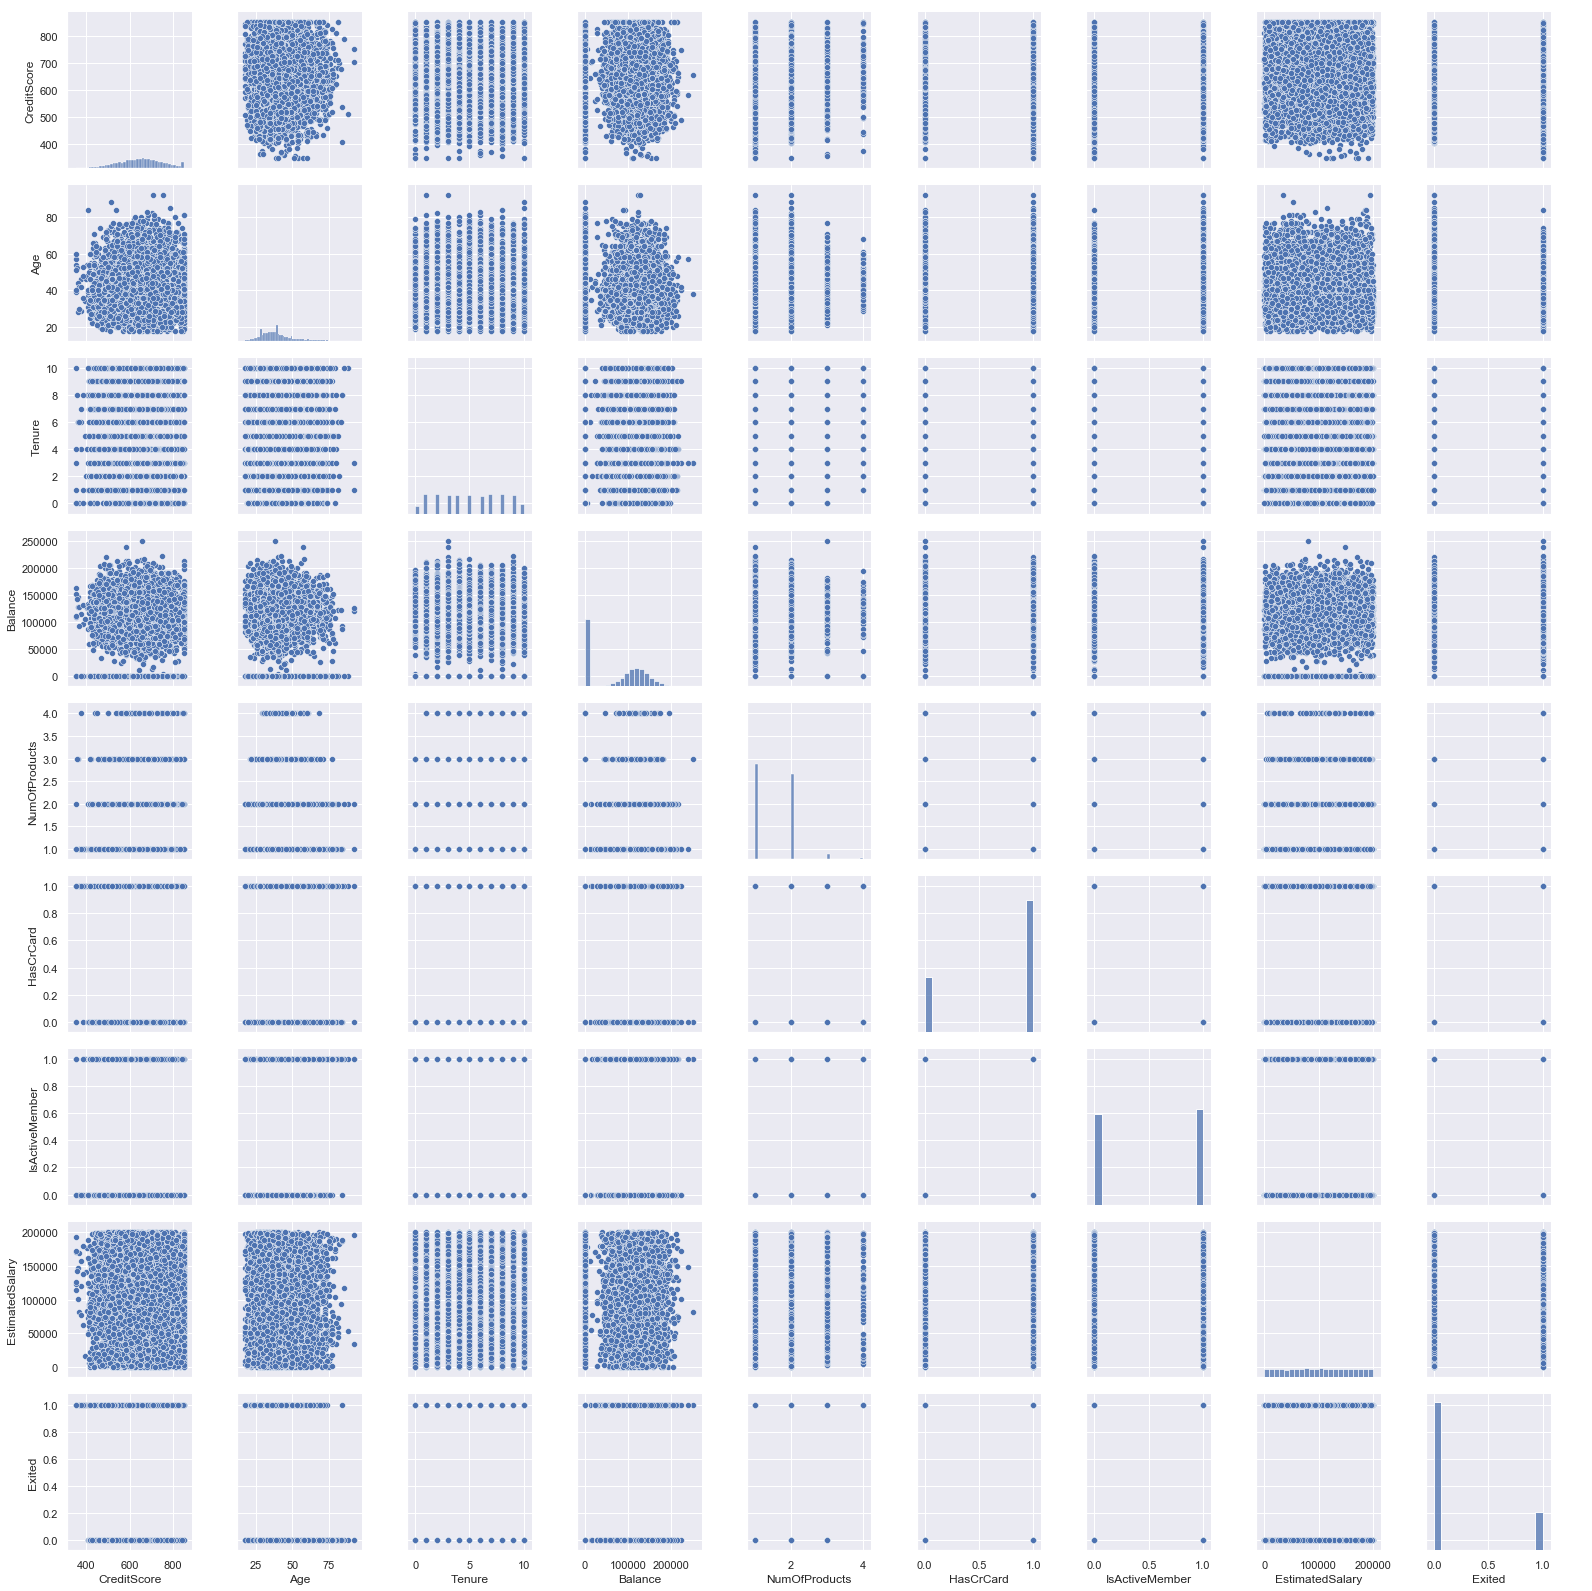

In [6]:
# use pairplot to visualize relationship between variables
sns.pairplot(data = bank)
plt.show()

In [7]:
# use plot with hue of target variable to see if there are any patterns

### Distinguish the feature and target set and divide the data set into training and test sets 

In [8]:
# split into X and y feature and target sets
X_data = bank.iloc[:,:-1]
y_data = bank['Exited']

display(X_data, y_data)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


0       1
1       0
2       1
3       0
4       0
5       1
6       0
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      1
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9970    0
9971    0
9972    0
9973    0
9974    0
9975    1
9976    0
9977    0
9978    0
9979    0
9980    0
9981    1
9982    1
9983    0
9984    0
9985    0
9986    0
9987    0
9988    0
9989    0
9990    0
9991    1
9992    0
9993    0
9994    0
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [9]:
# encode X data for categorical variables
X_data = pd.get_dummies(X_data, drop_first = True)

In [10]:
# import library for train_test_split and divide into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7)

### Normalize the train and test data 

In [11]:
# import library for preprossing to normalize the data
from sklearn import preprocessing
X_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1


In [12]:
X_train_n = preprocessing.normalize(X_train)
display(X_train_n)

array([[5.21547466e-03, 2.98027124e-04, 1.65570624e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.64961742e-03, 2.52571132e-04, 1.99398262e-05, ...,
        6.64660873e-06, 0.00000000e+00, 6.64660873e-06],
       [4.91075252e-03, 3.87091775e-04, 7.59003480e-06, ...,
        7.59003480e-06, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.23638988e-03, 2.16774336e-04, 3.71613148e-05, ...,
        0.00000000e+00, 0.00000000e+00, 6.19355246e-06],
       [5.37737031e-03, 2.66516896e-04, 7.05485901e-05, ...,
        0.00000000e+00, 7.83873224e-06, 7.83873224e-06],
       [4.36238487e-03, 1.56444147e-04, 3.61024955e-05, ...,
        0.00000000e+00, 0.00000000e+00, 6.01708258e-06]])

In [36]:
print(X_train_n.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 11) (3000, 11) (7000,) (3000,)


### Initialize & build the model. Identify the points of improvement and implement the same

In [13]:
#import keras and tensorflow libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers

In [37]:
#initialize the model
model = Sequential()

In [38]:
model.add(Dense(64, input_shape = (11,) , activation = 'relu'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

In [39]:
sgd = optimizers.Adam(lr = 0.001)

In [40]:
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


### Predict the results using 0.5 as a threshold

In [42]:
model.fit(X_train_n, y_train.values, batch_size = 700, epochs = 10, verbose = 1)

Epoch 1/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.7168
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.7987
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 0.5272 - accuracy: 0.7937
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.7982
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.7963
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7978
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.7967
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7960
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 0.5011 - accuracy: 0.7951
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 0.5172 - accuracy: 0.7838


In [43]:
X_test_n = preprocessing.normalize(X_test)

In [44]:
results = model.evaluate(X_test_n, y_test.values)

94/94 [==============================] - 0s 654us/step - loss: 0.4949 - accuracy: 0.7983


### Print the Accuracy score and confusion matrix

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
print(model.metrics_names)
print(np.around(results,3))

['loss', 'accuracy']
[0.495 0.798]


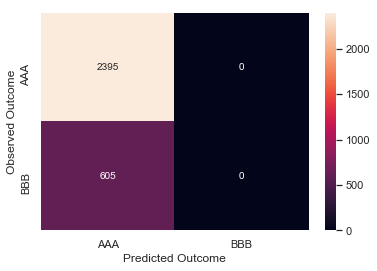

In [60]:
y_predict = model.predict_classes(X_test, batch_size = 200, verbose = 0)

# calculate values for confusion matrix and set as cm array
cm = confusion_matrix(y_test, y_predict)

# plot cm using heatmap from seaborn
sns.heatmap(cm, annot = True, xticklabels = ['AAA', 'BBB'], yticklabels = ['AAA', 'BBB'], fmt = 'g')
plt.xlabel('Predicted Outcome')
plt.ylabel('Observed Outcome')
plt.show()